In [1]:
import os
import json
import sys
import pandas as pd
import time

def read_json(path):
    with open(path, 'r', encoding="utf-8") as f:
        data = json.load(f)
    return data

def write_json(data, path):
    if not os.path.exists(os.path.dirname(path)):
        os.makedirs(os.path.dirname(path))
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=4, ensure_ascii=False)

In [2]:
train_data = read_json('./train_wiki_checked_1.json')
val_data_1 = read_json('./val_wiki_checked_1_1.json')
val_data_2 = read_json('./val_wiki_checked_2_1.json')
all_data = train_data + val_data_1 + val_data_2
all_data[0]

FileNotFoundError: [Errno 2] No such file or directory: './train_wiki_checked_1.json'

In [ ]:
write_json(all_data, './all_data_fewrel.json')

In [ ]:
train_wiki = read_json('./pid2name.json')

In [ ]:
relations = [item['relation'] for item in all_data ]
relations = list(set(relations))
relations


In [ ]:


relations_df = pd.DataFrame(relations)
relations_df.to_csv('./fewrel_relations.csv')

In [ ]:
all_data_df = pd.DataFrame(all_data)
child = all_data_df[all_data_df['relation'] == 'child']
mother = all_data_df[all_data_df['relation'] == 'mother']
father = all_data_df[all_data_df['relation'] == 'father']
sibling = all_data_df[all_data_df['relation'] == 'sibling']
followed_by = all_data_df[all_data_df['relation'] == 'followed_by']
follows = all_data_df[all_data_df['relation'] == 'follows']
part_of = all_data_df[all_data_df['relation'] == 'part of']
has_part = all_data_df[all_data_df['relation'] == 'has part']


In [ ]:
all_asymetrics = pd.concat([child, mother, father, sibling, followed_by, follows, part_of, has_part])
all_asymetrics.to_json("./all_asymetrics.json", orient="records", indent=4, index=False)


In [ ]:
all_asymetrics = read_json('./all_asymetrics.json')
relation_pids = [item['r_pid'] for item in all_asymetrics]

In [ ]:
cleaned_asymetrics = []
for item in all_asymetrics:
  if  item['has_relation'] == True and  item['r_pid'] in item['possible_probs']:
    item['possible_probs'] = [prob for prob in item['possible_probs'] if prob in relation_pids]
    if len(item['possible_probs']) ==  2:
      cleaned_asymetrics.append(item)

In [ ]:
cleaned_asymetrics_df = pd.DataFrame(cleaned_asymetrics)
cleaned_asymetrics_df.to_json("./cleaned_asymetrics.json", orient="records", indent=4, index=False)

In [ ]:
cleaned_asymetrics_df.to_csv('./cleaned_asymetrics.csv')

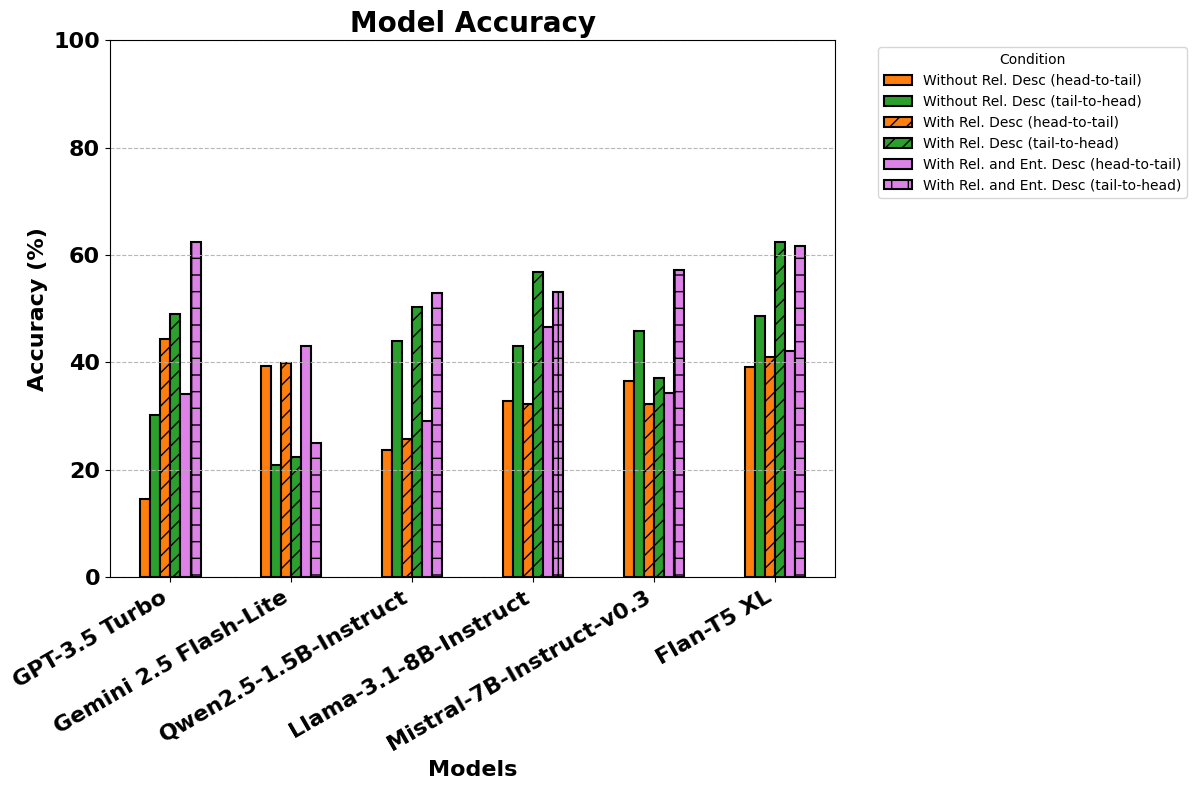

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Create dataframe based on the provided table
data = {
    "Model": [
        "GPT-3.5 Turbo",
        "Gemini 2.5 Flash-Lite",
        "Qwen2.5-1.5B-Instruct",
        "Llama-3.1-8B-Instruct",
        "Mistral-7B-Instruct-v0.3",
        "Flan-T5 XL"
    ],
    "Without Rel. Desc (head-to-tail)": [14.58, 39.34, 23.76, 32.90, 36.64, 39.16],
    "Without Rel. Desc (tail-to-head)": [30.23, 20.82, 43.99, 42.99, 45.84, 48.72],
    "With Rel. Desc (head-to-tail)": [44.43, 39.81, 25.67, 32.17, 32.31, 41.08],
    "With Rel. Desc (tail-to-head)": [49.07, 22.32, 50.34, 56.87, 37.02, 62.42],
    "With Rel. and Ent. Desc (head-to-tail)": [34.15, 43.10, 29.11, 46.66, 34.37, 42.16],
    "With Rel. and Ent. Desc (tail-to-head)": [62.39, 24.99, 52.98, 53.07, 57.13, 61.60]
}

df = pd.DataFrame(data)
df.set_index("Model", inplace=True, drop=False)

# Define custom color palette
colors = ["#ff7f0e", "#2ca02c", "#ff7f0e", "#2ca02c", "#dd82e7", "#dd82e7"]

# Define hatch patterns for lined bars
hatches = ['', '', '//', '//', '', '+']

# Create bar chart with custom colors, borders, and hatching
ax = df.plot(
    kind="bar",
    figsize=(12, 8),
    color=colors,
    edgecolor="black",
    linewidth=1.5
)

# Apply hatching pattern for each bar group
for i, bar_container in enumerate(ax.containers):
    for bar in bar_container:
        bar.set_hatch(hatches[i % len(hatches)])

# Add titles and labels
plt.title("Model Accuracy", fontsize=20, weight='bold')
plt.ylabel("Accuracy (%)", fontsize=16, weight='bold')
plt.xlabel("Models", fontsize=16, weight='bold')
plt.xticks(rotation=30, ha="right", fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.grid(axis="y", linestyle="--", alpha=0.9)

# Set y-axis limit up to 100
plt.ylim(0, 100)

# Move legend outside
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


### Probability at Flan T5 XL

In [102]:
import matplotlib.pyplot as plt

In [103]:
import numpy as np
def negative_logp_to_prob(neg_logp):
    return np.exp(np.array(neg_logp))


In [124]:
t5_without_desc_data = read_json('/Users/sefika/phd_projects/converse_relations/results/t5/output_t5_large_without_desc.json')
tail_probs_data_without_desc = [negative_logp_to_prob(item['predictions_2'][0][1]) for item in t5_without_desc_data]
head_probs_data_without_desc = [negative_logp_to_prob(item['predictions_1'][0][1]) for item in t5_without_desc_data]

In [125]:
tail_probs_data_without_desc = np.array(tail_probs_data_without_desc)
head_probs_data_without_desc = np.array(head_probs_data_without_desc)

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128999 (\N{LARGE ORANGE SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


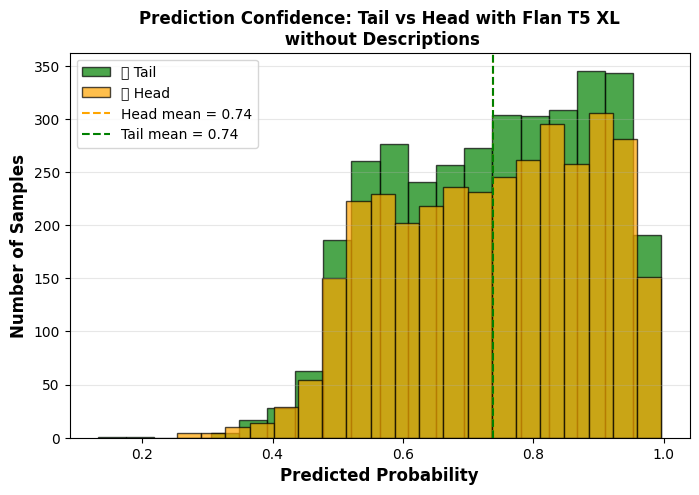

In [126]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8,5))
plt.hist(tail_probs_data_without_desc, bins=20, alpha=0.7, label='🟩 Tail', color='green', edgecolor='black')
plt.hist(head_probs_data_without_desc, bins=20, alpha=0.7, label='🟧 Head', color='orange', edgecolor='black')

# compute mean probabilities
mean_head = head_probs_data_without_desc.mean()
mean_tail = tail_probs_data_without_desc.mean()

# add vertical lines for mean predicted probabilities
plt.axvline(mean_head, color='orange', linestyle='--', label=f'Head mean = {mean_head:.2f}')
plt.axvline(mean_tail, color='green', linestyle='--', label=f'Tail mean = {mean_tail:.2f}')

plt.title("Prediction Confidence: Tail vs Head with Flan T5 XL\n without Descriptions", fontsize=12, weight='bold')
plt.xlabel("Predicted Probability", fontsize=12, weight='bold')
plt.ylabel("Number of Samples", fontsize=12, weight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()


# With Descriptions

In [122]:
t5_with_desc_data = read_json('/Users/sefika/phd_projects/converse_relations/results/t5/output_t5_large_with_desc.json')
# With Descriptions
tail_probs_data = [negative_logp_to_prob(item['predictions_2'][0][1]) for item in t5_with_desc_data]
head_probs_data = [negative_logp_to_prob(item['predictions_1'][0][1]) for item in t5_with_desc_data]
tail_probs_data = np.array(tail_probs_data)
head_probs_data = np.array(head_probs_data)


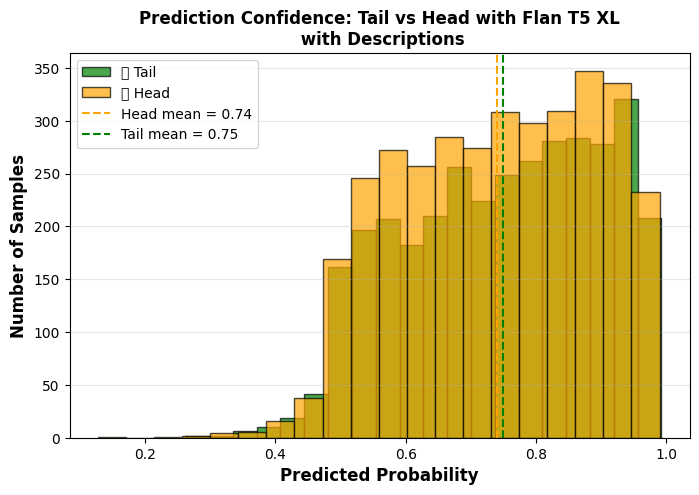

In [127]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8,5))
plt.hist(tail_probs_data, bins=20, alpha=0.7, label='🟩 Tail', color='green', edgecolor='black')
plt.hist(head_probs_data, bins=20, alpha=0.7, label='🟧 Head', color='orange', edgecolor='black')

# compute mean probabilities
mean_head = head_probs_data.mean()
mean_tail = tail_probs_data.mean()

# add vertical lines for mean predicted probabilities
plt.axvline(mean_head, color='orange', linestyle='--', label=f'Head mean = {mean_head:.2f}')
plt.axvline(mean_tail, color='green', linestyle='--', label=f'Tail mean = {mean_tail:.2f}')

plt.title("Prediction Confidence: Tail vs Head with Flan T5 XL\n with Descriptions", fontsize=12, weight='bold')
plt.xlabel("Predicted Probability", fontsize=12, weight='bold')
plt.ylabel("Number of Samples", fontsize=12, weight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()
